In [30]:
%matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# import sckitlearn.

In [209]:
D=pd.read_csv("../Titanic/train.csv")
D.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [55]:
# D.describe(include= 'all')

In [207]:
# feature engineering
# Parch
D.Parch[D.Parch>1]=1

/home/charlie/environments/PFDS/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [214]:
# change to numeric

# def numeric_cols
D.Cabin=D.Cabin.fillna(0)
D.Cabin.unique()
print(D.Name[D.Cabin=='C23 C25 C27'])

27     Fortune, Mr. Charles Alexander
88         Fortune, Miss. Mabel Helen
341    Fortune, Miss. Alice Elizabeth
438                 Fortune, Mr. Mark
Name: Name, dtype: object


In [205]:
#encoding some features into categorical numbers
# DT.drop("Name", axis=1)
D.Sex=D.Sex.astype("category").cat.codes
D.Ticket=D.Ticket.astype('category').cat.codes
D.Cabin=D.Cabin.astype('category').cat.codes
D.Embarked=D.Embarked.astype('category').cat.codes

In [206]:
D.Cabin.head()

0    -1
1    81
2    -1
3    55
4    -1
Name: Cabin, dtype: int16

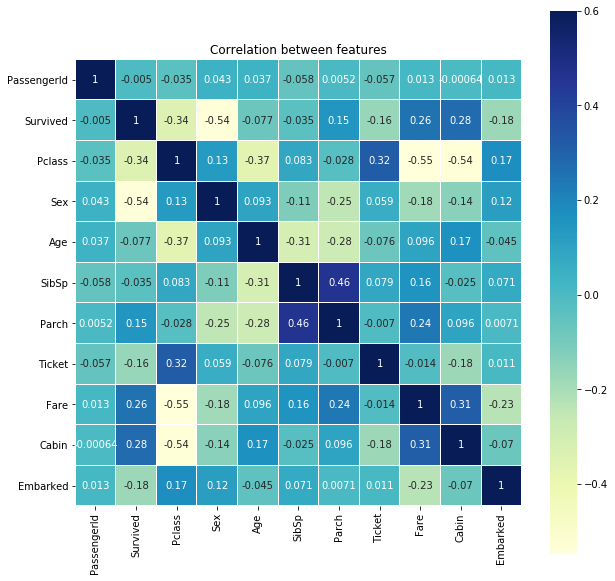

In [38]:
corr=D.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=0.6, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [151]:
#drop the outcome and save it as a separate DF, also drop non numeric ALSO DROP NA
DT=D
DT=DT.dropna(axis=0)
DTy=DT[['Survived']].copy()
DT=DT.drop(["Name","Survived", 'Cabin'], axis=1)
DT=DT.dropna(axis=0)
# DT.drop("Cabin", axis=1)
# DT.drop("Name", axis=1)

In [137]:

X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,805,3,1,27.0,0,0,338,6.9750,-1,2
89,90,3,1,24.0,0,0,297,8.0500,-1,2
881,882,3,1,33.0,0,0,394,7.8958,-1,2
860,861,3,1,41.0,2,0,399,14.1083,-1,2
350,351,3,1,23.0,0,0,503,9.2250,-1,2


In [75]:
DS.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,152,7.8292,1
1,893,3,0,47.0,1,0,221,7.0000,2
2,894,2,1,62.0,0,0,73,9.6875,1
3,895,3,1,27.0,0,0,147,8.6625,2
4,896,3,0,22.0,1,1,138,12.2875,2


In [124]:
DS=pd.read_csv("../Titanic/test.csv")

In [125]:
# refining data for test
DS.Sex=DS.Sex.astype("category").cat.codes
DS.Ticket=DS.Ticket.astype('category').cat.codes
DS.Cabin=DS.Cabin.astype('category').cat.codes
DS.Embarked=DS.Embarked.astype('category').cat.codes

In [126]:
DS=DS.drop(["Name"], axis=1)
DS=DS.dropna(axis=0)

In [129]:
result=DS[['PassengerId']].copy()
result['Survived']=(model.predict(DS))

In [135]:
result.head()
result.to_csv("../Titanic/submission.csv",index=False)

In [132]:
R=pd.read_csv("../Titanic/gender_submission.csv")
R.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [152]:
from sklearn. model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(DT,DTy,test_size=0.33)

In [153]:
# fit log rrg model with numeric non nan, numeric data
model = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,Y_train)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
model.score(X_test,Y_test)


0.7288135593220338

In [47]:
from sklearn.svm import SVC
model2=SVC(gamma='auto').fit(X_train,Y_train)
model2.score(X_test,Y_test)


/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6016949152542372

In [48]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.7669491525423728

In [49]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.7669491525423728

In [51]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
# y_kmeans = kmeans.predict(X_train,)

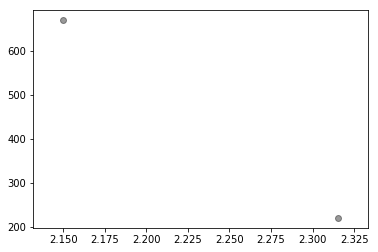

In [54]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')